In [ ]:
# Scrapper a computrabajo para obtener las ofertas de empleo
# import
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Peticion a la pagina
count = 1
ids = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "same-origin",
}

# Obtener el id de cada oferta de trabajo
for count in range(1, 21):
    url = f"https://co.computrabajo.com/trabajo-de-backend?p={count}"
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, "html.parser")

    # obtener las etiquetas Article
    articles = soup.find_all("article")

    # obtener atributo data-id de cada article
    aux = [article.attrs["data-id"] for article in articles]
    ids.extend(aux)

print(len(ids))
# ids

221


In [ ]:
ofertas = []
for oferta in ids:
    url_oferta = f"https://oferta.computrabajo.com/offer/{oferta}/d/j?ipo=1&iapo=1"
    respone_oferta = requests.get(url_oferta, headers=headers)

    # obtener del objeto json de la respuesta, la propiedad ld
    data = respone_oferta.json()
    ofertas.append(data)

# pandas table
data_pd = pd.json_normalize(ofertas)

# obtener cadena de caracteres en la posicion o.ld
data_pd

,o.ld,o.me,o.ey,o.mina,o.maxa,o.at,o.acr,o.dy,o.dn,o.v,...,c.v.ro.ad,c.v.rce.ad,c.v.tv,c.v.rp,c.v.hr,e.u,e.t,e.cl,o.la,o.k
0,Compañia multinacional de tecnología se encuen...,Universidad / Carrera Profesional,3.0,25.0,45.0,False,False,False,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estamos en búsqueda de un desarrollador Backen...,Universidad / Carrera técnica,4.0,NaN,NaN,False,False,False,True,10,...,3.57,3.86,68.0,94.0,True,/zemsania/evaluaciones,,"[{'c': 'RRHH Mánager & Consultant', 'iict': 'A...",NaN,NaN
2,Importante empresa del sector industrial ubica...,Universidad / Carrera tecnológica,1.0,20.0,45.0,False,False,False,True,1,...,NaN,NaN,NaN,NaN,NaN,,,[],NaN,NaN
3,¡ÚNETE A NUESTRO EQUIPO COMO DESARROLLADOR BAC...,Universidad / Carrera Profesional,3.0,NaN,NaN,False,False,True,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,¡Únete a Quick como Desarrollador Backend Seni...,Universidad / Carrera tecnológica,3.0,NaN,NaN,False,False,True,True,2,...,3.42,3.79,3323.0,94.0,True,/empresas/evaluaciones-en-quick-help--D735E7BB...,,"[{'c': 'Chófer mensajero motociclista', 'iict'...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Trabaja como Agente Call Center Bilingüe en Ba...,Bachillerato / Educación Media,NaN,NaN,NaN,False,False,False,True,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,This is a very important role in a small and g...,Universidad / Carrera tecnológica,1.0,NaN,NaN,False,False,True,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inglés,NaN
218,Trabaja como Customer Service Representative e...,Bachillerato / Educación Media,NaN,NaN,NaN,False,False,False,True,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,Bienvenidos a SOFTGNET\r\n\r\nRequerimos apren...,Bachillerato / Educación Media,NaN,NaN,NaN,False,False,False,True,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_backup = data_pd.copy()

In [ ]:
data_pd = data_backup.copy()

In [ ]:
# Realizar limpieza de datos
# eliminar de "o.ld" las cadenas "\r\n" y "\t"
data_pd["o.ld"] = data_pd["o.ld"].str.replace("\r\n", "")
data_pd["o.ld"] = data_pd["o.ld"].str.replace("\t", " ")
data_pd["o.ld"] = data_pd["o.ld"].str.replace("\xa0", " ")


In [ ]:
# mantener columnas o.ld, o.me, o.s y o.c
data_pd = data_pd[["o.ld", "o.me", "o.s", "o.c"]]
data_pd.columns = ["descripcion", "educación", "salario", "ciudad"]

Analisis de datos

In [ ]:
data_pd

,descripcion,educación,salario,ciudad
0,Compañia multinacional de tecnología se encuen...,Universidad / Carrera Profesional,0,"Bogotá, D.C."
1,Estamos en búsqueda de un desarrollador Backen...,Universidad / Carrera técnica,0,Medellín
2,Importante empresa del sector industrial ubica...,Universidad / Carrera tecnológica,2500000,Cali
3,¡ÚNETE A NUESTRO EQUIPO COMO DESARROLLADOR BAC...,Universidad / Carrera Profesional,4500000,"Bogotá, D.C."
4,¡Únete a Quick como Desarrollador Backend Seni...,Universidad / Carrera tecnológica,3716000,"Bogotá, D.C."
...,...,...,...,...
216,Trabaja como Agente Call Center Bilingüe en Ba...,Bachillerato / Educación Media,3050000,Barranquilla
217,This is a very important role in a small and g...,Universidad / Carrera tecnológica,0,Medellín
218,Trabaja como Customer Service Representative e...,Bachillerato / Educación Media,0,Barranquilla
219,Bienvenidos a SOFTGNETRequerimos aprendices qu...,Bachillerato / Educación Media,0,Barranquilla


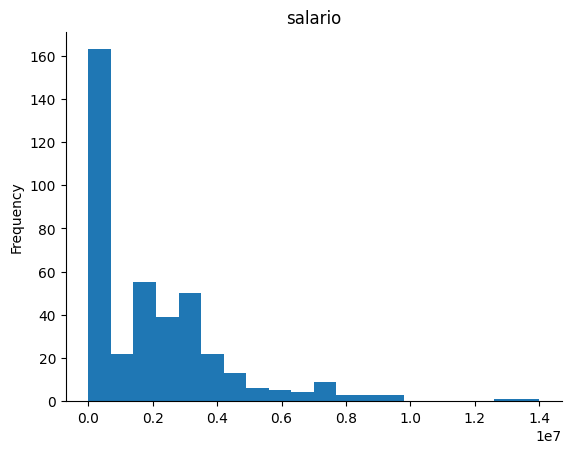

In [ ]:
# @title salario

from matplotlib import pyplot as plt
data_pd['salario'].plot(kind='hist', bins=20, title='salario')
plt.gca().spines[['top', 'right',]].set_visible(False)

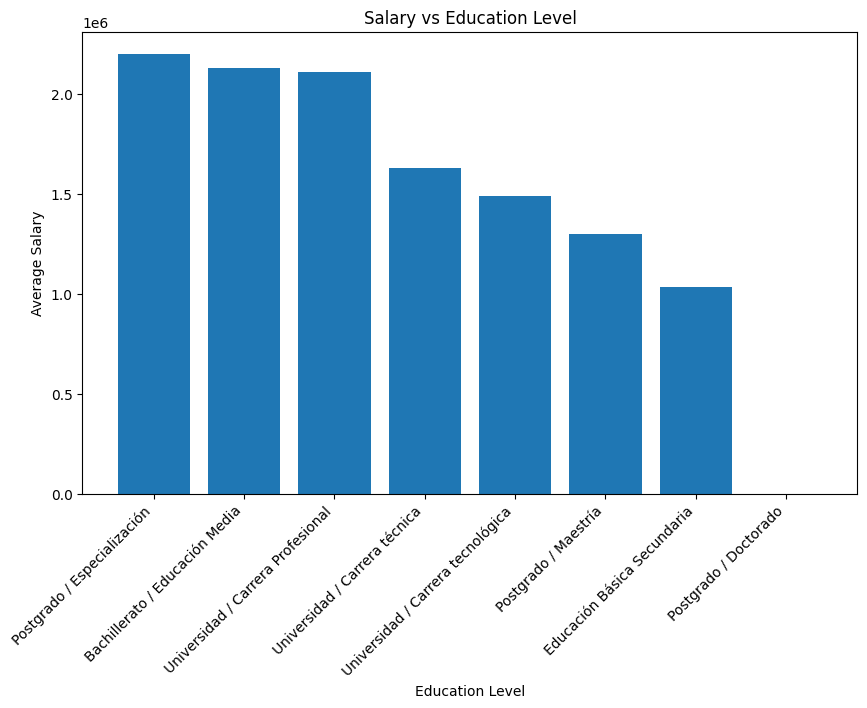

In [ ]:
# @title Salary vs Education Level

import pandas as pd
import matplotlib.pyplot as plt

education_salary = data_pd.groupby('educación')['salario'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(education_salary.index, education_salary.values)
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Salary vs Education Level')
_ = plt.xticks(rotation=45, ha='right')

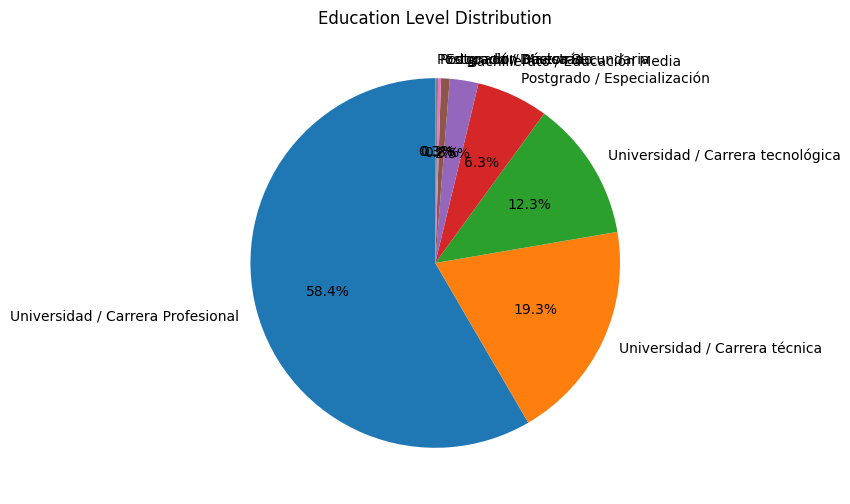

In [ ]:
# @title Education Level Distribution

import matplotlib.pyplot as plt

education_level_counts = data_pd['educación'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(education_level_counts, labels=education_level_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Education Level Distribution')

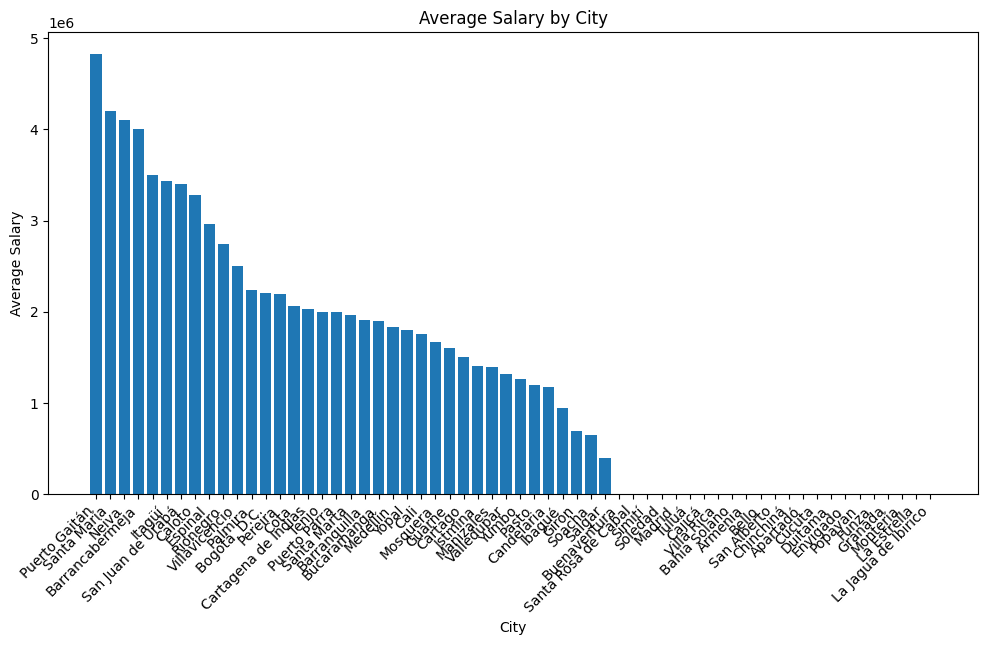

In [ ]:
# @title Average Salary by City

import pandas as pd
import matplotlib.pyplot as plt

avg_salary_by_city = data_pd.groupby('ciudad')['salario'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(avg_salary_by_city.index, avg_salary_by_city.values)
plt.xlabel('City')
plt.ylabel('Average Salary')
plt.title('Average Salary by City')
_ = plt.xticks(rotation=45, ha='right')

In [ ]:
df = data_pd.copy()

# Definir categorías y sus palabras clave
categorias_palabras = {
    "control": ["control", "PLC", "PID", "sistemas de control"],
    "automatización": ["automatización", "robot", "SCADA", "automatización industrial"],
    "telecomunicaciones": ["telecomunicaciones", "redes", "fibra óptica", "wifi", "cableado"],
    "iot": ["IoT", "internet de las cosas", "sensores inteligentes"],
    "soporte": ["soporte", "helpdesk", "asistencia técnica"],
    "reparación de equipos": ["reparación", "mantenimiento de equipos", "diagnóstico"],
    "venta":["venta", "sucursal", "compras"]
}

# Función modificada para manejar descripciones nulas
def clasificar_oferta(descripcion):
    if pd.isna(descripcion):  # Si la descripción es NaN, devolver "Sin categoría"
        return "Sin categoría"
    categorias_encontradas = []
    descripcion = descripcion.lower()  # Convertir a minúsculas para búsqueda
    for categoria, palabras in categorias_palabras.items():
        if any(palabra.lower() in descripcion for palabra in palabras):
            categorias_encontradas.append(categoria)
    return ", ".join(categorias_encontradas) if categorias_encontradas else "Sin categoría"

# Aplicar la clasificación nuevamente
df["categorias"] = df["descripcion"].apply(clasificar_oferta)

# Mostrar las primeras filas con las categorías clasificadas
df.head()

,descripcion,educación,salario,ciudad,categorias
0,Compañia multinacional de tecnología se encuen...,Universidad / Carrera Profesional,0,"Bogotá, D.C.",Sin categoría
1,Estamos en búsqueda de un desarrollador Backen...,Universidad / Carrera técnica,0,Medellín,Sin categoría
2,Importante empresa del sector industrial ubica...,Universidad / Carrera tecnológica,2500000,Cali,soporte
3,¡ÚNETE A NUESTRO EQUIPO COMO DESARROLLADOR BAC...,Universidad / Carrera Profesional,4500000,"Bogotá, D.C.",Sin categoría
4,¡Únete a Quick como Desarrollador Backend Seni...,Universidad / Carrera tecnológica,3716000,"Bogotá, D.C.",Sin categoría


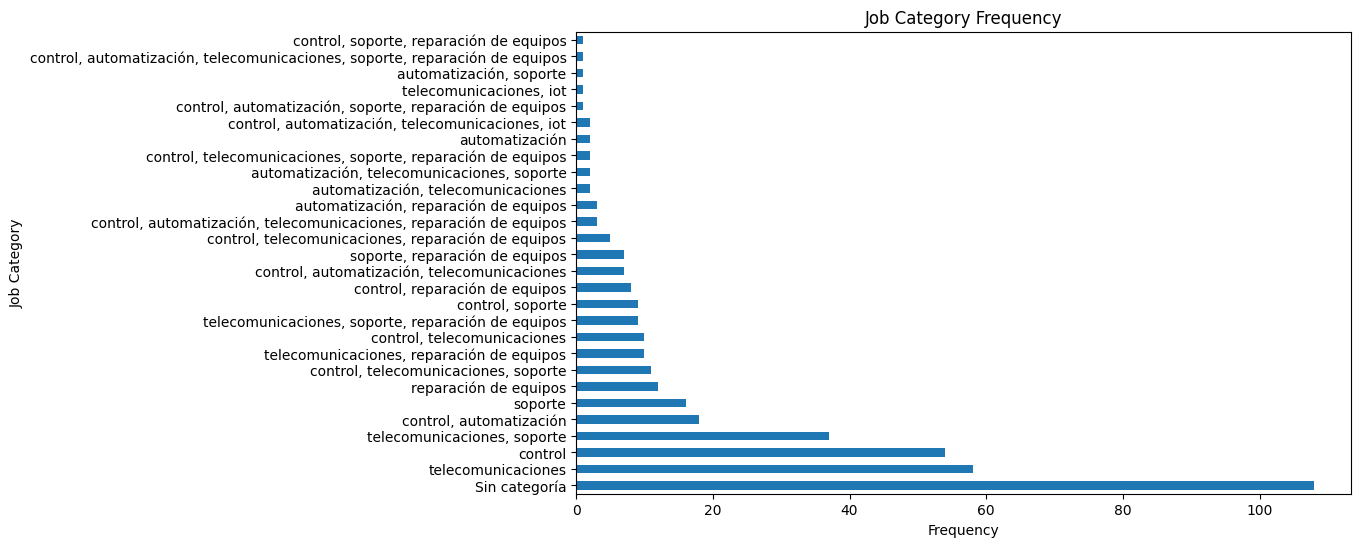

In [ ]:
# @title Job Category Frequency

import matplotlib.pyplot as plt

category_counts = df['categorias'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh')
plt.title('Job Category Frequency')
plt.xlabel('Frequency')
_ = plt.ylabel('Job Category')

In [ ]:
import re

# Patrón de expresión regular para buscar salarios en el formato $X.XXX.XXX o $X,XXX,XXX
patron_salario = r"\$\s?([\d\.,]+)"  # El grupo está correctamente definido con paréntesis

# Función para extraer y convertir el salario a número
def extraer_salario_numerico(descripcion):
    if pd.isna(descripcion):  # Si la descripción es NaN, devolver 0
        return 0
    resultado = re.search(patron_salario, descripcion)
    if resultado:
        salario_str = resultado.group(1).replace(".", "").replace(",", "")
        return int(salario_str)  # Convertir el salario a entero
    else:
        return 0  # Si no se encuentra salario, devolver 0

# Aplicar la función para extraer salarios
df["salario_extraido"] = df["descripcion"].apply(extraer_salario_numerico)

# Mostrar las primeras filas con los salarios extraídos
df.head()

,descripcion,educación,salario,ciudad,categorias,salario_extraido
0,Compañia multinacional de tecnología se encuen...,Universidad / Carrera Profesional,0,"Bogotá, D.C.",Sin categoría,0
1,Estamos en búsqueda de un desarrollador Backen...,Universidad / Carrera técnica,0,Medellín,Sin categoría,0
2,Importante empresa del sector industrial ubica...,Universidad / Carrera tecnológica,2500000,Cali,soporte,2500000
3,¡ÚNETE A NUESTRO EQUIPO COMO DESARROLLADOR BAC...,Universidad / Carrera Profesional,4500000,"Bogotá, D.C.",Sin categoría,0
4,¡Únete a Quick como Desarrollador Backend Seni...,Universidad / Carrera tecnológica,3716000,"Bogotá, D.C.",Sin categoría,3716000


In [ ]:
df[df["salario_extraido"] != 0]

,descripcion,educación,salario,ciudad,categorias,salario_extraido
2,Importante empresa del sector industrial ubica...,Universidad / Carrera tecnológica,2500000,Cali,soporte,2500000
4,¡Únete a Quick como Desarrollador Backend Seni...,Universidad / Carrera tecnológica,3716000,"Bogotá, D.C.",Sin categoría,3716000
23,Te queremos en nuestro equipo Actualmente nos ...,Universidad / Carrera tecnológica,4499998,Medellín,Sin categoría,4
36,¿Qué hacemos? Somos una startup dedicada a la ...,Universidad / Carrera tecnológica,4000000,"Bogotá, D.C.",control,3000000
48,La agencia de gestión y colocación de empleo C...,Universidad / Carrera tecnológica,2600000,Cali,automatización,260000
50,"En la Fortuna S.A seguimos creciendo contigo, ...",Universidad / Carrera tecnológica,0,Santander de Quilichao,Sin categoría,2570000
84,"En la Fortuna S.A seguimos creciendo contigo, ...",Universidad / Carrera Profesional,0,Santander de Quilichao,Sin categoría,2570000
98,Importante empresa del sector de seguros se en...,Universidad / Carrera tecnológica,2999999,"Bogotá, D.C.",Sin categoría,3000000
100,Importante multinacional del sector de tecnolo...,Universidad / Carrera Profesional,4200000,"Bogotá, D.C.",control,3500000
103,Haz parte de nuestro equipo y vive experiencia...,Universidad / Carrera tecnológica,3500000,"Bogotá, D.C.",Sin categoría,3500000


In [ ]:
def reemplazar_salario(fila):
    # Si el salario es 0 o NaN, usar el salario extraído
    if pd.isna(fila["salario"]) or fila["salario"] == 0:
        return fila["salario_extraido"]
    else:
        return fila["salario"]

# Aplicar la función para reemplazar salarios faltantes
df["salario_final"] = df.apply(reemplazar_salario, axis=1)

# Mostrar las primeras filas con el salario final
print(df[["descripcion", "salario", "salario_extraido", "salario_final"]].head())
salary_df = df[["descripcion", "educación", "ciudad", "salario_final", "categorias"]]


                                         descripcion  salario  \
0  Compañia multinacional de tecnología se encuen...        0   
1  Estamos en búsqueda de un desarrollador Backen...        0   
2  Importante empresa del sector industrial ubica...  2500000   
3  ¡ÚNETE A NUESTRO EQUIPO COMO DESARROLLADOR BAC...  4500000   
4  ¡Únete a Quick como Desarrollador Backend Seni...  3716000   

   salario_extraido  salario_final  
0                 0              0  
1                 0              0  
2           2500000        2500000  
3                 0        4500000  
4           3716000        3716000  


In [ ]:
final_df = salary_df[salary_df["salario_final"] != 0]
len(final_df)

45

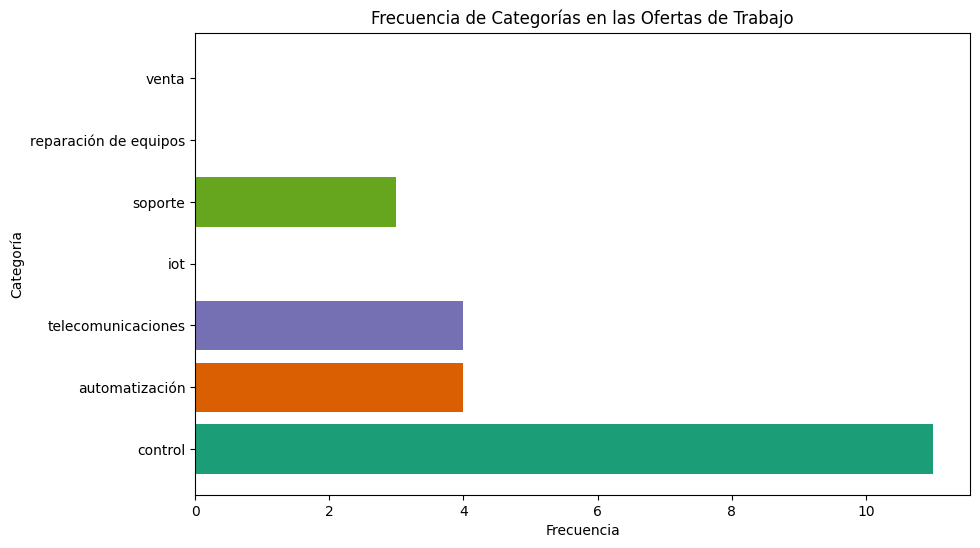

In [ ]:
# contar las veces que sale cada categoria en el dataset
categorias = categorias_palabras.keys()

categorias_conteo = {
    "control": 0,
    "automatización": 0,
    "telecomunicaciones": 0,
    "iot": 0,
    "soporte": 0,
    "reparación de equipos": 0,
    "venta": 0
}

# categoria en formato tipo "control, soporte"
for categorias_oferta in final_df["categorias"]:
    for categoria in categorias:
        if categoria in categorias_oferta:
            categorias_conteo[categoria] += 1

categorias_conteo
# crear diagrama de frecuencia horizontal
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.barh(list(categorias_conteo.keys()), list(categorias_conteo.values()), color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Frecuencia de Categorías en las Ofertas de Trabajo')
plt.show()

In [ ]:
final_df[["educación", "ciudad", "salario_final"]]

,educación,ciudad,salario_final
2,Universidad / Carrera tecnológica,Cali,2500000
3,Universidad / Carrera Profesional,"Bogotá, D.C.",4500000
4,Universidad / Carrera tecnológica,"Bogotá, D.C.",3716000
5,Postgrado / Especialización,"Bogotá, D.C.",9112600
8,Universidad / Carrera Profesional,Barrancabermeja,5000000
9,Universidad / Carrera Profesional,"Bogotá, D.C.",5700000
23,Universidad / Carrera tecnológica,Medellín,4499998
24,Universidad / Carrera tecnológica,Medellín,5499999
36,Universidad / Carrera tecnológica,"Bogotá, D.C.",4000000
37,Universidad / Carrera tecnológica,"Bogotá, D.C.",8000000


<ipython-input-22-b2bb4bc52bb2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(final_df, x='salario_final', y='educación', inner='stick', palette='Dark2')


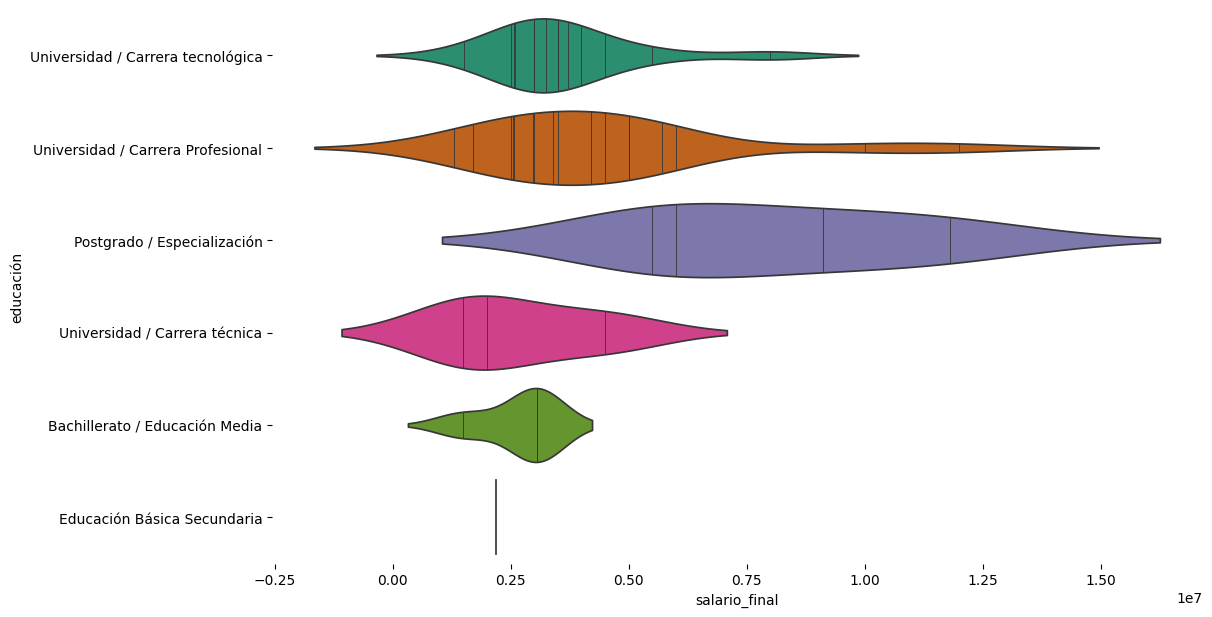

In [ ]:
# @title educación vs salario_final

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_df['educación'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_df, x='salario_final', y='educación', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0.5, 1.0, 'Frecuencia de Educación requerida en las Ofertas de Trabajo')

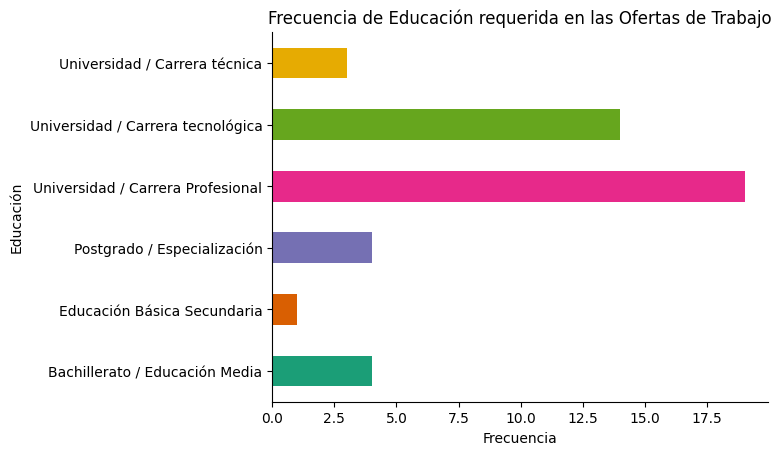

In [ ]:
# @title educación

from matplotlib import pyplot as plt
import seaborn as sns
final_df.groupby('educación').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Frecuencia')
plt.ylabel('Educación')
plt.title('Frecuencia de Educación requerida en las Ofertas de Trabajo')


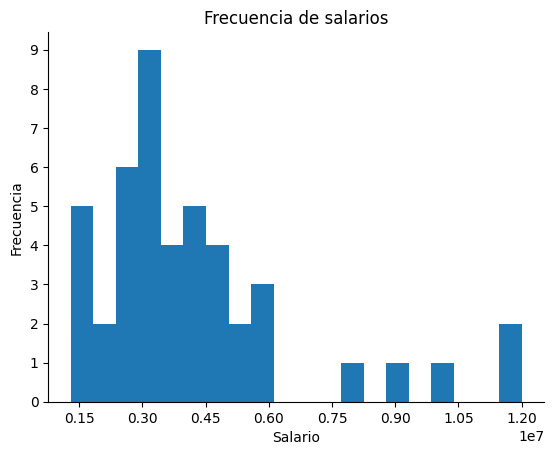

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

# Crear la gráfica
final_df['salario_final'].plot(kind='hist', bins=20, title='Frecuencia de salarios')

# Configurar los ejes para que no usen notación científica
plt.gca().xaxis.set_major_locator(MaxNLocator(10))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=False))

# Eliminar los bordes superiores y derechos
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de salarios')

# Mostrar la gráfica
plt.show()

In [ ]:
final_df.to_csv("ofertas_final.csv", index=False)
#